In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

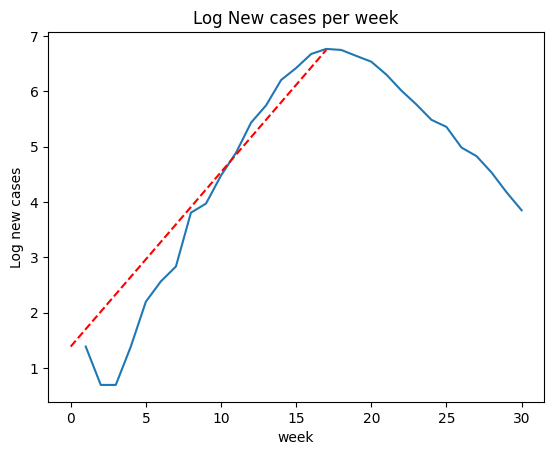

In [66]:
df = pd.read_csv("HW4_all_weeks.csv")

CUTOFF_WEEK = 17

weeks = np.array(df["Week"])
new_cases = np.array(df["New Cases"])
new_cases = np.log(new_cases[:30])

plt.plot(weeks[:30], new_cases[:30])
plt.title("Log New cases per week")
plt.xlabel("week")
plt.ylabel("Log new cases")

m = (new_cases[CUTOFF_WEEK] - new_cases[0]) / CUTOFF_WEEK

n = CUTOFF_WEEK

x = np.linspace(0,n, n)
preds = m * x + new_cases[0]
plt.plot(x, preds, '--', color='red') 

residuals = new_cases[:n] - preds

s = np.sqrt(np.sum(residuals**2) / (n - 2))

x_mean = np.mean(weeks)

SE_b1 = s / np.sqrt(np.sum((x - x_mean)**2))

t_value = stats.t.ppf(0.975, df=n-2)  

CI_lower = m - t_value * SE_b1
CI_upper = m + t_value * SE_b1

In [64]:
print(CI_upper, CI_lower)

0.316656188689594 0.31408406609975004


In [136]:
data = pd.read_csv("HW4_Q3_data-1.csv")
pos = pd.read_csv("HW4_Q3_pos-1.csv")
neg = pd.read_csv("HW4_Q3_neg-1.csv")

Text(0, 0.5, 'values')

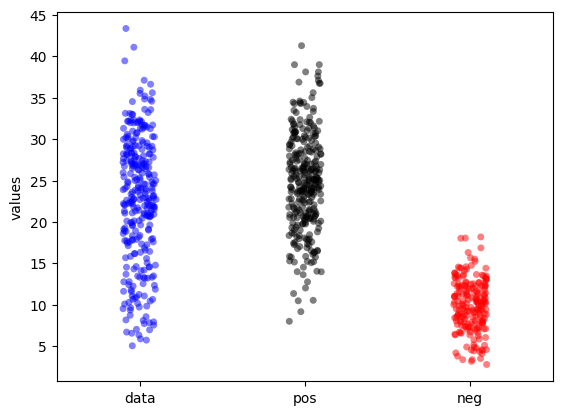

In [140]:
df = pd.concat([data,pos,neg])
colors = {'data': 'blue', 'pos': 'black', 'neg':'red'}
sns.stripplot(df,jitter=True, alpha = .5, palette = colors)
plt.ylabel("values")

In [184]:
cs = np.linspace(0,45,46)

def se(pos, c):
    # tp / tp + fn
    num_pos = len(pos)
    TP = np.sum(pos > c) # number of pos above c
    return TP / num_pos
def sp(neg,c):
    num_neg = len(neg)
    TN = np.sum(neg < c) # number of pos above c
    return TN / num_neg

def J(pos,neg, c):
    pos = pos.values.flatten()
    neg = neg.values.flatten()
    return se(pos,c) + sp(neg,c) - 1

js = []
for c in cs:
    js.append(J(pos,neg,c))
print(max(js))
print(np.argmax(js))

0.9199999999999999
15
